In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 
import ipywidgets as widgets

In [2]:
import pandas as pd
df = pd.read_csv("ie.csv", delimiter=',', skiprows=0, low_memory=False)
df['city']

0                 Dublin
1                   Cork
2                 Galway
3               Limerick
4              Waterford
5               Drogheda
6            Dún Dealgan
7                 Swords
8                 Tralee
9                 Carlow
10              Dunleary
11              Kilkenny
12                  Naas
13                 Sligo
14                  Cobh
15             Killarney
16               Shannon
17             Dungarvan
18               Kildare
19          Carrigtohill
20              Monaghan
21              Dunboyne
22               Roscrea
23               Kinsale
24            Ros Comáin
25              Gweedore
26                Cashel
27             Mullingar
28              Tallaght
29               Wicklow
30               Clonmel
31               Wexford
32                 Ennis
33              Longford
34                  Trim
35    Carrick on Shannon
36             Tullamore
37                Nenagh
38             An Cabhán
39           Port Laoise


In [3]:
df

,city,lat,lng,country,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,X,Y,Unnamed: 10,Xp,Yp,admin_name,capital,population,population_proper
0,Dublin,53.3425,-6.2658,Ireland,6371,0.5970,0.9940,1,3780.957624,-415.137387,1,-415.137387,-3780.957624,Dublin,Dublin,1173179,1173179.0
1,Cork,51.9000,-8.4731,Ireland,6371,0.6170,0.9891,2,3888.227805,-579.233398,2,-579.233398,-3888.227805,Cork,Cork,208669,208669.0
2,Galway,53.2729,-9.0418,Ireland,6371,0.5980,0.9876,3,3762.543620,-598.742505,3,-598.742505,-3762.543620,Galway,Galway,79504,79504.0
3,Limerick,52.6653,-8.6238,Ireland,6371,0.6065,0.9887,4,3820.137036,-579.364645,4,-579.364645,-3820.137036,Limerick,Limerick,58319,58319.0
4,Waterford,52.2583,-7.1190,Ireland,6371,0.6121,0.9923,5,3869.643264,-483.292732,5,-483.292732,-3869.643264,Waterford,Waterford,48369,48369.0
5,Drogheda,53.7139,-6.3503,Ireland,6371,0.5918,0.9939,6,3747.335488,-417.039898,6,-417.039898,-3747.335488,Louth,Drogheda,40956,40956.0
6,Dún Dealgan,54.0090,-6.4049,Ireland,6371,0.5877,0.9938,7,3720.601739,-417.654549,7,-417.654549,-3720.601739,Louth,Dún Dealgan,39004,39004.0
7,Swords,53.4597,-6.2181,Ireland,6371,0.5954,0.9941,8,3770.900977,-410.856284,8,-410.856284,-3770.900977,Fingal,Swords,33998,33998.0
8,Tralee,52.2675,-9.6962,Ireland,6371,0.6120,0.9857,9,3843.200349,-656.667931,9,-656.667931,-3843.200349,Kerry,Tralee,26384,22941.0
9,Carlow,52.8306,-6.9317,Ireland,6371,0.6042,0.9927,10,3821.055366,-464.543683,10,-464.543683,-3821.055366,Carlow,Carlow,24272,24272.0


-579.233398228436

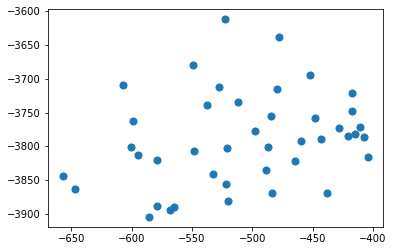

In [4]:
x=df['Xp'] 
y=df['Yp'] 
plt.scatter(x,y,s=50)
df.loc[1,'Xp']

In [5]:
model = AbstractModel()
model.N =Param (mutable=True)
model.i = RangeSet(1,model.N)
model.j = Set(initialize=model.i)

def rule_initx(model,i):
    return df.loc[i-1,'Xp']
def rule_inity(model,i):
    return df.loc[i-1,'Yp']
def rule_initPOP(model,i):
    return 0.8*df.loc[i-1,'population']

model.xp =Param (model.i, default=rule_initx, mutable=True) 
model.yp =Param (model.i, default=rule_inity, mutable=True)
model.population =Param (model.i, default=rule_initPOP, mutable=True)

def rule_init2D(model,i,j):
    return sqrt((model.xp[i]-model.xp[j])**2+(model.yp[i]-model.yp[j])**2)
model.d  =Param  (model.i,model.j, initialize=rule_init2D, mutable=True)

model.alpha  =Param  (initialize=0.2, mutable=True)


def rule_initflow1(model,i,j):
    return (0,(1-model.alpha)*model.population[i])
def rule_initflow2(model,i,j):
    return (0,model.alpha*model.population[i])

model.flow1 = Var(model.i,model.j, bounds=rule_initflow1,within=NonNegativeReals)
model.flow2 = Var(model.i,model.j, bounds=rule_initflow2, within=NonNegativeReals)

model.y = Var(model.i,within=Binary)

def rule_C1(model,j):
    if j==1:
        return quicksum(model.flow1[i,j]+model.flow2[i,j] for i in model.i) <= 0.8*model.population[j]*model.y[j]
    else:
        return quicksum(model.flow1[i,j]+model.flow2[i,j] for i in model.i) <=400000*model.y[j]
        
model.C1 = Constraint(model.j,rule=rule_C1)


def rule_C2(model,i):
    return quicksum(model.flow1[i,j]+model.flow2[i,j] for j in model.j ) ==model.population[i]
model.C2 = Constraint(model.i,rule=rule_C2)


def rule_of(model):
    return quicksum(300000*model.y[j] for j in model.j) + quicksum(model.d[i,j]*(0.25*model.flow1[i,j]+0.5*model.flow2[i,j]) for i in model.i for j in model.j )   
model.obj = Objective(rule=rule_of, sense=minimize)

In [6]:
model.N=len(df)
opt = SolverFactory('gurobi')
instance = model.create_instance()

In [7]:
results = opt.solve(instance) # solves and updates instance

if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)
    
print('OF= ',value(instance.obj) )

feasible
OF=  6369732.629860271


In [10]:
x=df['Xp'] 
y=df['Yp'] 

#plt.scatter(x,y,s=50)
import itertools
markers = itertools.cycle(('*', 'o', 'v', '^', '<', '>', 's', '8', 'p'))
markers = ['*', 'o', 'v', '^', '<', '>', 's', '8', 'p']
marker=['o','*','.','x','P','<','>','1','2','3','4','|','_']
colors=plt.cm.get_cmap('Paired').colors
mc_list = list(itertools.product(markers, colors))

mc_list={}
#print(len(marker),len(color))
iter=0
while iter<len(df):
    iter+=1
    i=random.randint(1,len(marker))
    j=random.randint(1,len(color))
    mc_list[iter]=(marker[i-1],color[j-1])

    
    

def f(Alpha):
    instance.alpha=Alpha
    results = opt.solve(instance) # solves and updates instance

    plt.figure(figsize=(8,8)) 

    for i in instance.i:
        for j in instance.j:
            X=[x[i-1],x[j-1]]
            Y=[y[i-1],y[j-1]]
            plt.title('Share of Car owners = ' + str(Alpha) )
            plt.plot(X,Y , c='grey', lw=0.05, alpha=0.6)
            if value(instance.flow1[i,j]) >1:
                plt.plot(X,Y , c='k', lw=0.5+2*value(instance.flow1[i,j])/300000)
                plt.scatter(x[i-1],y[i-1], s=10, c='r' )
            if value(instance.flow2[i,j]) >1:
                plt.plot(X,Y , c='b', lw=1+2*value(instance.flow2[i,j])/300000)
            if value(instance.flow2[i,j])*value(instance.flow1[i,j]) >1:
                plt.plot(X,Y , c='r', lw=1+2*value(instance.flow2[i,j])/200000)

    for j in instance.j:
        if value(instance.y[j]) >0.1:
            plt.scatter(x[j-1],y[j-1], s=300,facecolors='white', edgecolors='r' )
            plt.text(x[j-1]+5,y[j-1]+5,s=df.loc[j-1,'city'] , fontsize=10)
        else:
            #plt.text(x[j-1]+3,y[j-1]-2,s=df.loc[j-1,'city'] , fontsize=10)
            plt.scatter(x[j-1],y[j-1], s=100, color=mc_list[j][1], marker=mc_list[j][0] , label=df.loc[j-1,'city'] )

    #plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
    plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0.1)
    plt.axis('off')
    plt.savefig('Covid Vaccination'+str(Alpha)+'.png', format='png', bbox_inches='tight', dpi=500)

interactive_plot = widgets.interactive(f, Alpha=(0, 0.9,0.1))
output = interactive_plot.children[-1]
output.layout.height = '900px'
interactive_plot



interactive(children=(FloatSlider(value=0.4, description='Alpha', max=0.9), Output(layout=Layout(height='900px…